In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn 
import os

In [2]:
path = "F:/Document/France/ENPC/Cours/S5/Projet/data/"
os.chdir(path)

In [26]:
df_data = pd.read_csv("alldata.csv", header=0)

In [27]:
df_data.head()

,Niveau,Fréquences 1,Fréquences 2,Amortissement 1,Amortissement 2,Exploitable,Temps,Vitesse,Fréquences,FRF réel,FRF imag,X Fourier,Y Fourier
0,0.0,1787.0,1887.0,2.999,0.685,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009452226, -0.00673604, -0.00773401, -0.00...","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -2.302514e-05, -5.967823e-05, 0.0002342...","[0.0, -2.668274e-05, -0.0002514399, 0.00014453...","[0.0, 16.286644951140065, 32.57328990228013, 4...","[6.05676302517, 0.06357554243412454, 0.2330839..."
1,0.0,1703.0,1854.0,1.116,0.692,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009723845, -0.01022985, -0.009524251, -0.0...","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, 3.561831e-05, 7.394589e-05, -0.00116518...","[0.0, -2.237394e-05, -0.0002670759, 0.00040503...","[0.0, 16.286644951140065, 32.57328990228013, 4...","[6.020322157060001, 0.09808489066176616, 0.323..."
2,1.0,1536.0,1753.0,1.270,0.666,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.005207651, -0.004080281, -0.003525446, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, 0.0003261978, 0.001021632, 0.001841591,...","[0.0, 6.054156e-05, -0.001706973, 0.0150348, -...","[0.0, 16.286644951140065, 32.57328990228013, 4...","[5.68165648649, 0.3757512668931713, 1.12653681..."
3,0.0,1720.0,1870.0,0.399,0.744,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009192205, -0.007869514, -0.005686188, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -0.000162651, 0.0005646234, 0.002073547...","[0.0, 2.962237e-05, 0.0004077999, 9.425909e-05...","[0.0, 16.286644951140065, 32.57328990228013, 4...","[6.035050226369999, 0.1193753389315661, 0.2514..."
4,0.0,1737.0,1937.0,1.434,1.875,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009271554, -0.005567775, -0.007788333, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -0.0004254416, 0.0007007722, -0.0006456...","[0.0, 0.0003771491, -9.416138e-05, 0.000957456...","[0.0, 16.286644951140065, 32.57328990228013, 4...","[6.1836696919, 0.39076803847102703, 0.24298958..."


In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23124 entries, 0 to 23123
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Niveau           23124 non-null  float64
 1   Fréquences 1     23124 non-null  float64
 2   Fréquences 2     23124 non-null  float64
 3   Amortissement 1  23044 non-null  float64
 4   Amortissement 2  23044 non-null  float64
 5   Exploitable      22594 non-null  float64
 6   Temps            23124 non-null  object 
 7   Vitesse          23124 non-null  object 
 8   Fréquences       23124 non-null  object 
 9   FRF réel         23124 non-null  object 
 10  FRF imag         23124 non-null  object 
 11  X Fourier        23124 non-null  object 
 12  Y Fourier        23124 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.3+ MB


In [41]:
df_data = df_data.dropna()

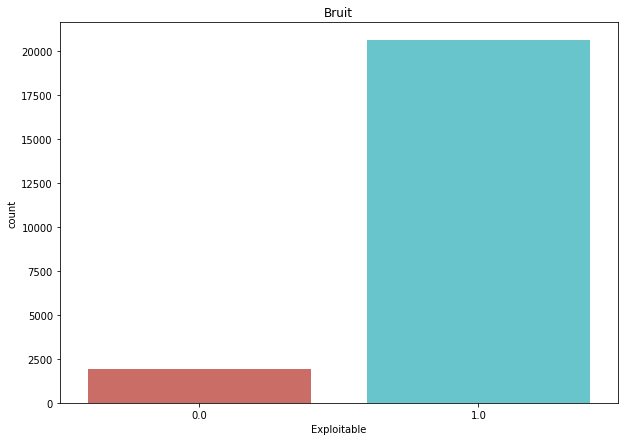

In [43]:
fig = plt.figure(figsize=(10, 7))
g = sns.countplot(x="Exploitable", data=df_data, palette="hls")
g.set_title("Bruit")
plt.show()

In [44]:
df_data = df_data.drop(df_data[df_data['Exploitable'] == 0].index)

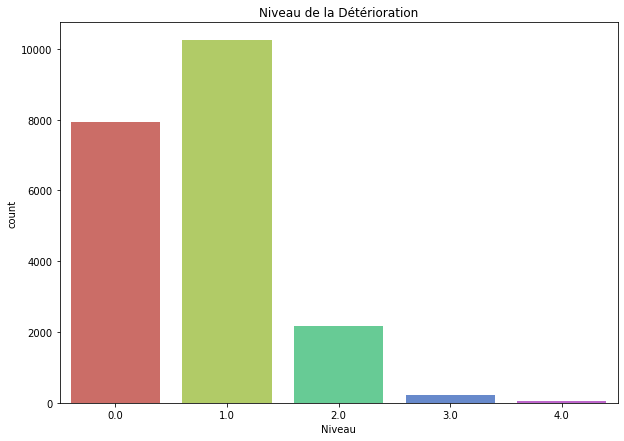

In [45]:
fig = plt.figure(figsize=(10, 7))
g = sns.countplot(x="Niveau", data=df_data, palette="hls")
g.set_title("Niveau de la Détérioration")
plt.show()

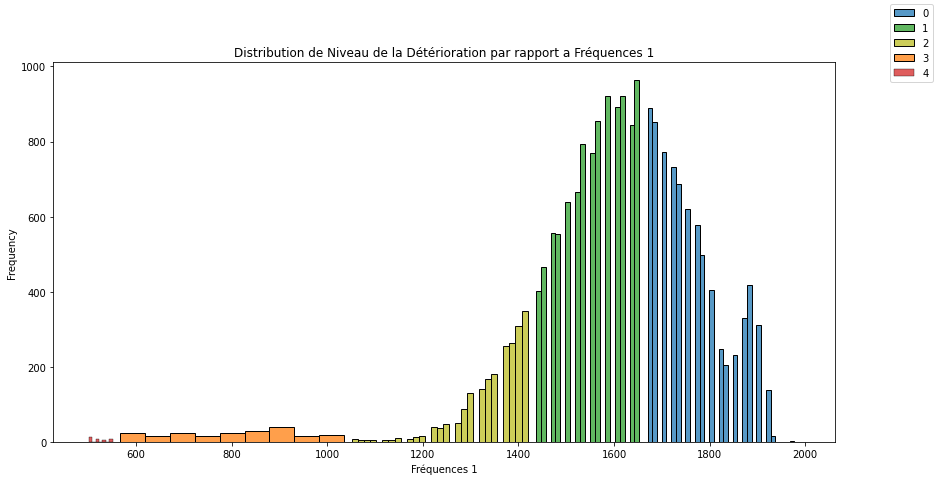

In [46]:
fig = plt.figure(figsize=(14, 7))
g = sns.histplot(df_data[df_data["Niveau"]==0]["Fréquences 1"], color="tab:blue")
g = sns.histplot(df_data[df_data["Niveau"]==1]["Fréquences 1"], color="tab:green")
g = sns.histplot(df_data[df_data["Niveau"]==2]["Fréquences 1"], color="tab:olive")
g = sns.histplot(df_data[df_data["Niveau"]==3]["Fréquences 1"], color="tab:orange")
g = sns.histplot(df_data[df_data["Niveau"]==4]["Fréquences 1"], color="tab:red")
g.set_xlabel("Fréquences 1")
g.set_ylabel("Frequency")
g.set_title("Distribution de Niveau de la Détérioration par rapport a Fréquences 1")
fig.legend(labels=["0", "1", "2", "3", "4"])
plt.show()

In [47]:
np_vitesse_n0 = df_data[df_data["Niveau"]==0]["Vitesse"].values
np_temps_n0 = df_data[df_data["Niveau"]==0]["Temps"].values
np_frequence_n0 = df_data[df_data["Niveau"]==0]["Fréquences"].values
np_frf_reel_n0 = df_data[df_data["Niveau"]==0]["FRF réel"].values
np_frf_img_n0 = df_data[df_data["Niveau"]==0]["FRF imag"].values
np_xfourier_n0 = df_data[df_data["Niveau"]==0]["X Fourier"].values
np_yfourier_n0 = df_data[df_data["Niveau"]==0]["Y Fourier"].values

In [48]:
np_vitesse_n1 = df_data[df_data["Niveau"]==1]["Vitesse"].values
np_temps_n1 = df_data[df_data["Niveau"]==1]["Temps"].values
np_frequence_n1 = df_data[df_data["Niveau"]==1]["Fréquences"].values
np_frf_reel_n1 = df_data[df_data["Niveau"]==1]["FRF réel"].values
np_frf_img_n1 = df_data[df_data["Niveau"]==1]["FRF imag"].values
np_xfourier_n1 = df_data[df_data["Niveau"]==1]["X Fourier"].values
np_yfourier_n1 = df_data[df_data["Niveau"]==1]["Y Fourier"].values

In [49]:
np_vitesse_n2 = df_data[df_data["Niveau"]==2]["Vitesse"].values
np_temps_n2 = df_data[df_data["Niveau"]==2]["Temps"].values
np_frequence_n2 = df_data[df_data["Niveau"]==2]["Fréquences"].values
np_frf_reel_n2 = df_data[df_data["Niveau"]==2]["FRF réel"].values
np_frf_img_n2 = df_data[df_data["Niveau"]==2]["FRF imag"].values
np_xfourier_n2 = df_data[df_data["Niveau"]==2]["X Fourier"].values
np_yfourier_n2 = df_data[df_data["Niveau"]==2]["Y Fourier"].values

In [50]:
np_vitesse_n3 = df_data[df_data["Niveau"]==3]["Vitesse"].values
np_temps_n3 = df_data[df_data["Niveau"]==3]["Temps"].values
np_frequence_n3 = df_data[df_data["Niveau"]==3]["Fréquences"].values
np_frf_reel_n3 = df_data[df_data["Niveau"]==3]["FRF réel"].values
np_frf_img_n3 = df_data[df_data["Niveau"]==3]["FRF imag"].values
np_xfourier_n3 = df_data[df_data["Niveau"]==3]["X Fourier"].values
np_yfourier_n3 = df_data[df_data["Niveau"]==3]["Y Fourier"].values

In [51]:
np_vitesse_n4 = df_data[df_data["Niveau"]==4]["Vitesse"].values
np_temps_n4 = df_data[df_data["Niveau"]==4]["Temps"].values
np_frequence_n4 = df_data[df_data["Niveau"]==4]["Fréquences"].values
np_frf_reel_n4 = df_data[df_data["Niveau"]==4]["FRF réel"].values
np_frf_img_n4 = df_data[df_data["Niveau"]==4]["FRF imag"].values
np_xfourier_n4 = df_data[df_data["Niveau"]==4]["X Fourier"].values
np_yfourier_n4 = df_data[df_data["Niveau"]==4]["Y Fourier"].values

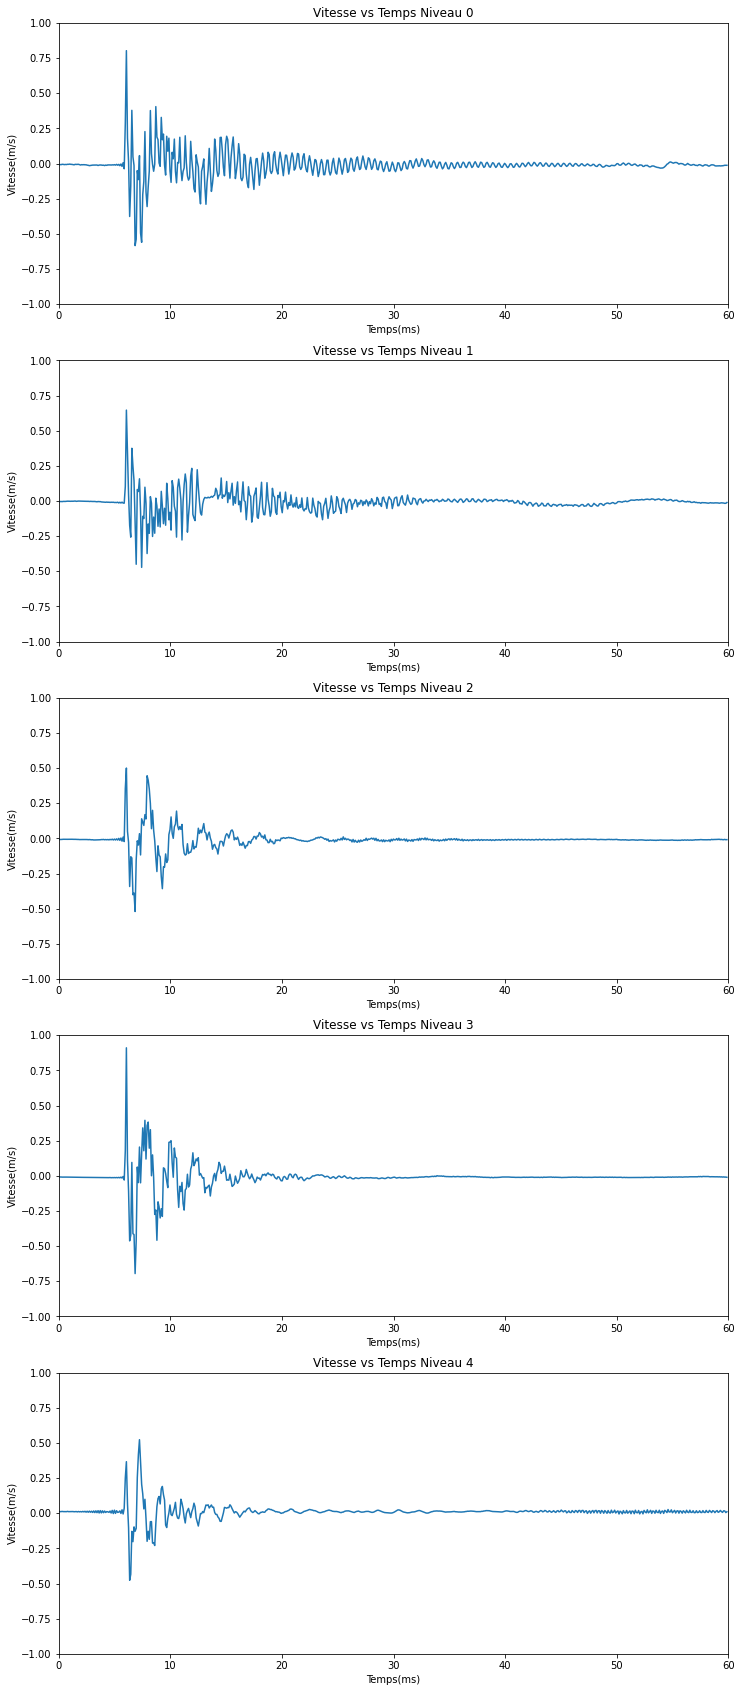

In [52]:
fig, axs = plt.subplots(5, figsize=(12,30))
axs[0].plot(eval(np_temps_n0[0]), eval(np_vitesse_n0[0]))
axs[0].set_title("Vitesse vs Temps Niveau 0")
axs[0].set(xlim=(0, 60), xlabel="Temps(ms)", ylim=(-1, 1), ylabel="Vitesse(m/s)")
axs[1].plot(eval(np_temps_n1[0]), eval(np_vitesse_n1[0]))
axs[1].set_title('Vitesse vs Temps Niveau 1')
axs[1].set(xlim=(0, 60), xlabel="Temps(ms)", ylim=(-1, 1), ylabel="Vitesse(m/s)")
axs[2].plot(eval(np_temps_n2[0]), eval(np_vitesse_n2[0]))
axs[2].set_title('Vitesse vs Temps Niveau 2')
axs[2].set(xlim=(0, 60), xlabel="Temps(ms)", ylim=(-1, 1), ylabel="Vitesse(m/s)")
axs[3].plot(eval(np_temps_n3[0]), eval(np_vitesse_n3[0]))
axs[3].set_title('Vitesse vs Temps Niveau 3')
axs[3].set(xlim=(0, 60), xlabel="Temps(ms)", ylim=(-1, 1), ylabel="Vitesse(m/s)")
axs[4].plot(eval(np_temps_n4[0]), eval(np_vitesse_n4[0]))
axs[4].set_title('Vitesse vs Temps Niveau 4')
axs[4].set(xlim=(0, 60), xlabel="Temps(ms)", ylim=(-1, 1), ylabel="Vitesse(m/s)")
plt.show()


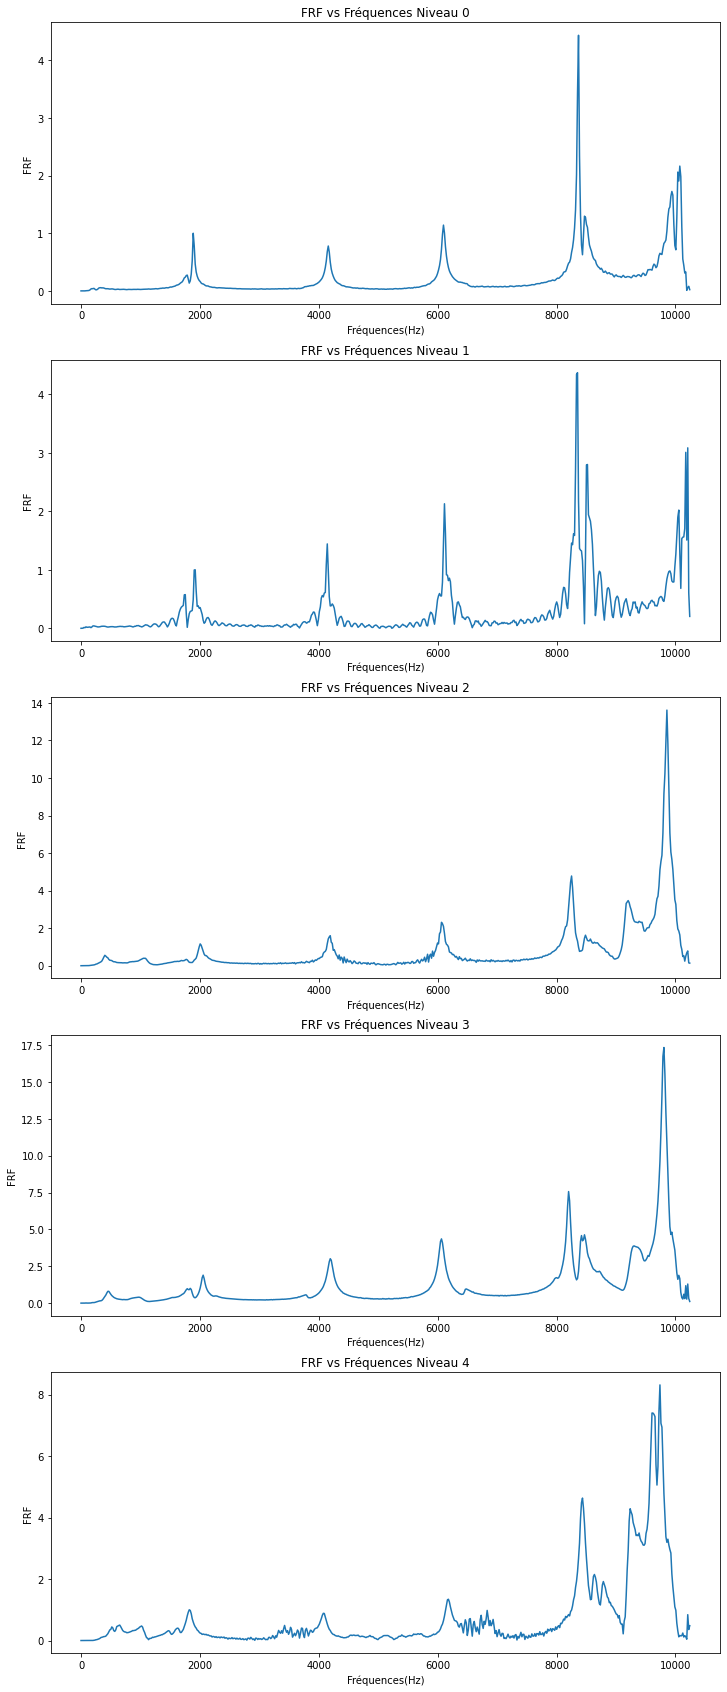

In [55]:
fig, axs = plt.subplots(5, figsize=(12,30))
frf = np.sqrt(np.square(eval(np_frf_reel_n0[0])) + np.square(eval(np_frf_img_n0[0])))
axs[0].plot(eval(np_frequence_n0[0]), frf)
axs[0].set_title("FRF vs Fréquences Niveau 0")
axs[0].set(xlabel="Fréquences(Hz)", ylabel="FRF")
frf = np.sqrt(np.square(eval(np_frf_reel_n1[0])) + np.square(eval(np_frf_img_n1[0])))
axs[1].plot(eval(np_frequence_n1[0]), frf)
axs[1].set_title("FRF vs Fréquences Niveau 1")
axs[1].set(xlabel="Fréquences(Hz)", ylabel="FRF")
frf = np.sqrt(np.square(eval(np_frf_reel_n2[0])) + np.square(eval(np_frf_img_n2[0])))
axs[2].plot(eval(np_frequence_n2[0]), frf)
axs[2].set_title("FRF vs Fréquences Niveau 2")
axs[2].set(xlabel="Fréquences(Hz)", ylabel="FRF")
frf = np.sqrt(np.square(eval(np_frf_reel_n3[0])) + np.square(eval(np_frf_img_n3[0])))
axs[3].plot(eval(np_frequence_n3[0]), frf)
axs[3].set_title("FRF vs Fréquences Niveau 3")
axs[3].set(xlabel="Fréquences(Hz)", ylabel="FRF")
frf = np.sqrt(np.square(eval(np_frf_reel_n4[0])) + np.square(eval(np_frf_img_n4[0])))
axs[4].plot(eval(np_frequence_n4[0]), frf)
axs[4].set_title("FRF vs Fréquences Niveau 4")
axs[4].set(xlabel="Fréquences(Hz)", ylabel="FRF")
plt.show()

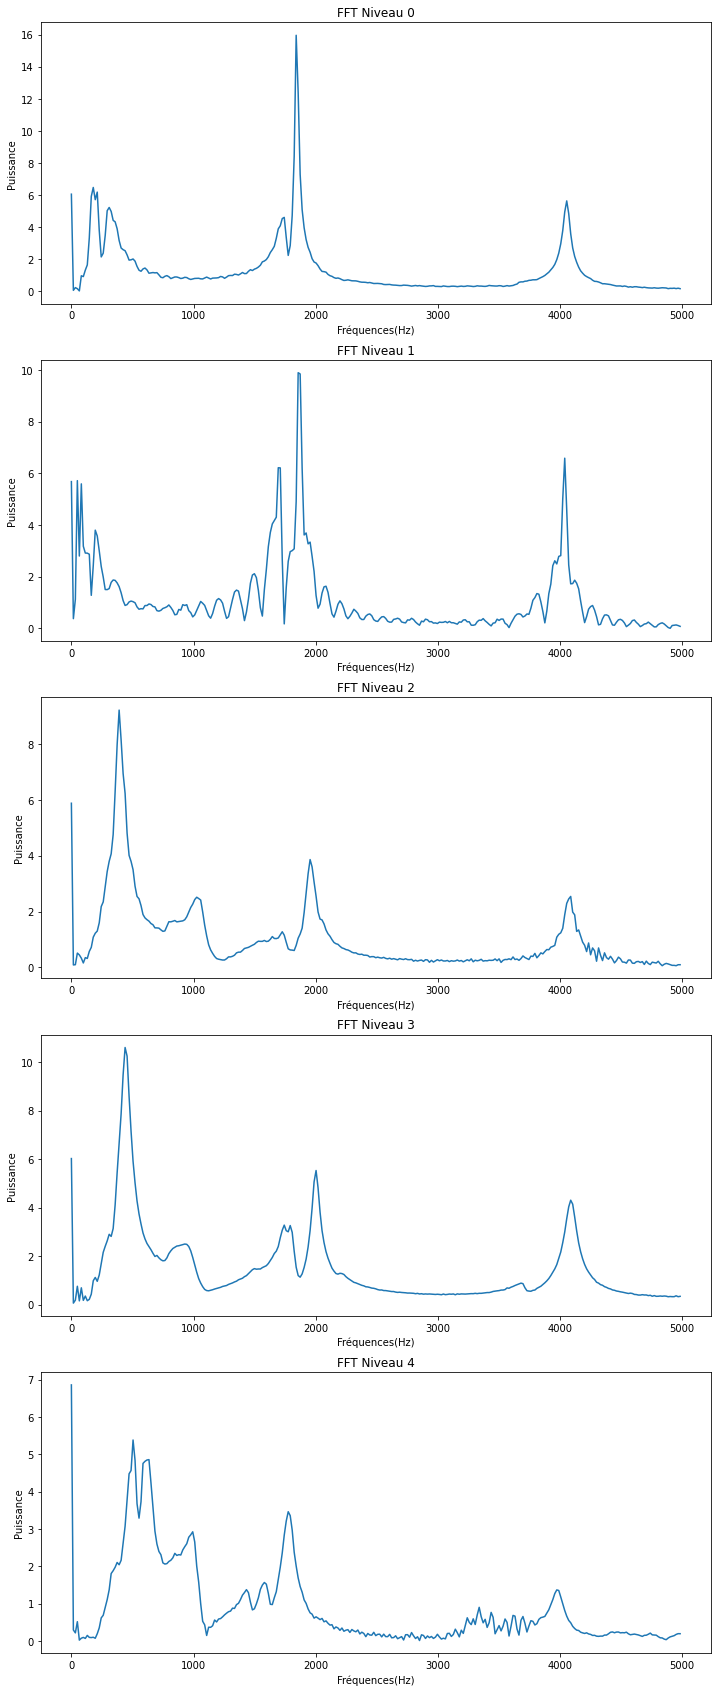

In [54]:
fig, axs = plt.subplots(5, figsize=(12,30))
axs[0].plot(eval(np_xfourier_n0[0]), eval(np_yfourier_n0[0]))
axs[0].set_title("FFT Niveau 0")
axs[0].set(xlabel="Fréquences(Hz)", ylabel="Puissance")
axs[1].plot(eval(np_xfourier_n1[0]), eval(np_yfourier_n1[0]))
axs[1].set_title("FFT Niveau 1")
axs[1].set(xlabel="Fréquences(Hz)", ylabel="Puissance")
axs[2].plot(eval(np_xfourier_n2[0]), eval(np_yfourier_n2[0]))
axs[2].set_title("FFT Niveau 2")
axs[2].set(xlabel="Fréquences(Hz)", ylabel="Puissance")
axs[3].plot(eval(np_xfourier_n3[0]), eval(np_yfourier_n3[0]))
axs[3].set_title("FFT Niveau 3")
axs[3].set(xlabel="Fréquences(Hz)", ylabel="Puissance")
axs[4].plot(eval(np_xfourier_n4[0]), eval(np_yfourier_n4[0]))
axs[4].set_title("FFT Niveau 4")
axs[4].set(xlabel="Fréquences(Hz)", ylabel="Puissance")
plt.show()